## Bibliotecas necesarias:

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io
from scipy.ndimage import rotate  #para rotar 
import sympy #para visualizar la matriz

## Transformada de Fourier 


### Ejercicio 1
Calcular y graficar la transformada de Fourier de matriz/imagen/señal 2D

In [2]:
imagen_completa= cv2.imread('lung_disease.png',0) 
ima=imagen_completa[200:400,200:400]
print("El tipo de cada píxel es ",ima.dtype)
print("Las dimensiones de la transformada de la imagen: ",ima.shape)

El tipo de cada píxel es  uint8
Las dimensiones de la transformada de la imagen:  (200, 200)


In [3]:
tf_ima=np.fft.fft2(ima) # calculo de la transformada de fourier 2D
print("El tipo de cada píxel es ",tf_ima.dtype)
print("Las dimensiones de la transformada de la imagen: ",tf_ima.shape)

El tipo de cada píxel es  complex128
Las dimensiones de la transformada de la imagen:  (200, 200)


Observar que el tipo de dato de cada pixel de la transformada de Fourier es complejo.

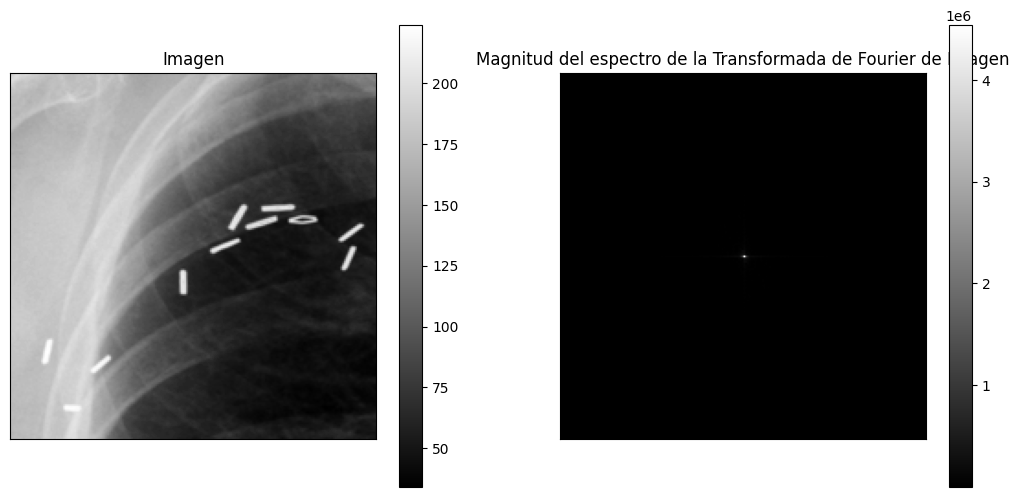

In [5]:
tfshift = np.fft.fftshift(tf_ima) #Centramos la TF en las frecuencias bajas
plt.figure(figsize=(13,6))
plt.subplot(121),plt.imshow(ima, cmap = 'gray')
plt.colorbar()
plt.title('Imagen'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(abs(tfshift), cmap = 'gray')
plt.colorbar()
plt.title('Magnitud del espectro de la Transformada de Fourier de Imagen'), plt.xticks([]), plt.yticks([])
plt.show()

Vemos un puntito blanco en el centro pero parece no mostrarnos mucha informacion, para eso vamos a aplicarles una transformacion logaritmica a la magnitud del espectro de la Transformada de Fourier.

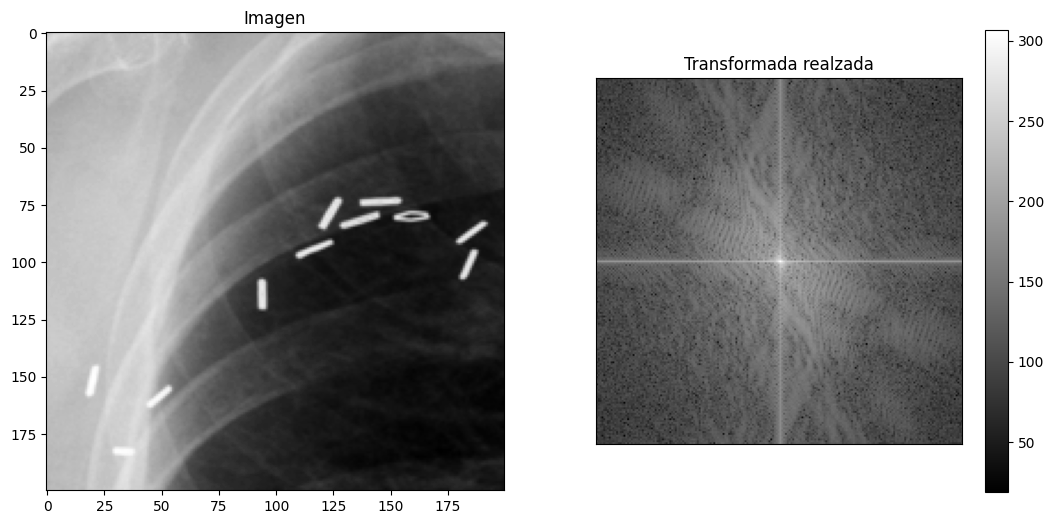

In [6]:
transf_realzada = 20*np.log(abs(tfshift)) # :-P

plt.figure(figsize=(13,6))
plt.subplot(121),plt.imshow(ima, cmap = 'gray')
plt.title('Imagen')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(transf_realzada, cmap = 'gray')
plt.colorbar()
plt.title('Transformada realzada'), plt.xticks([]), plt.yticks([])
plt.show()

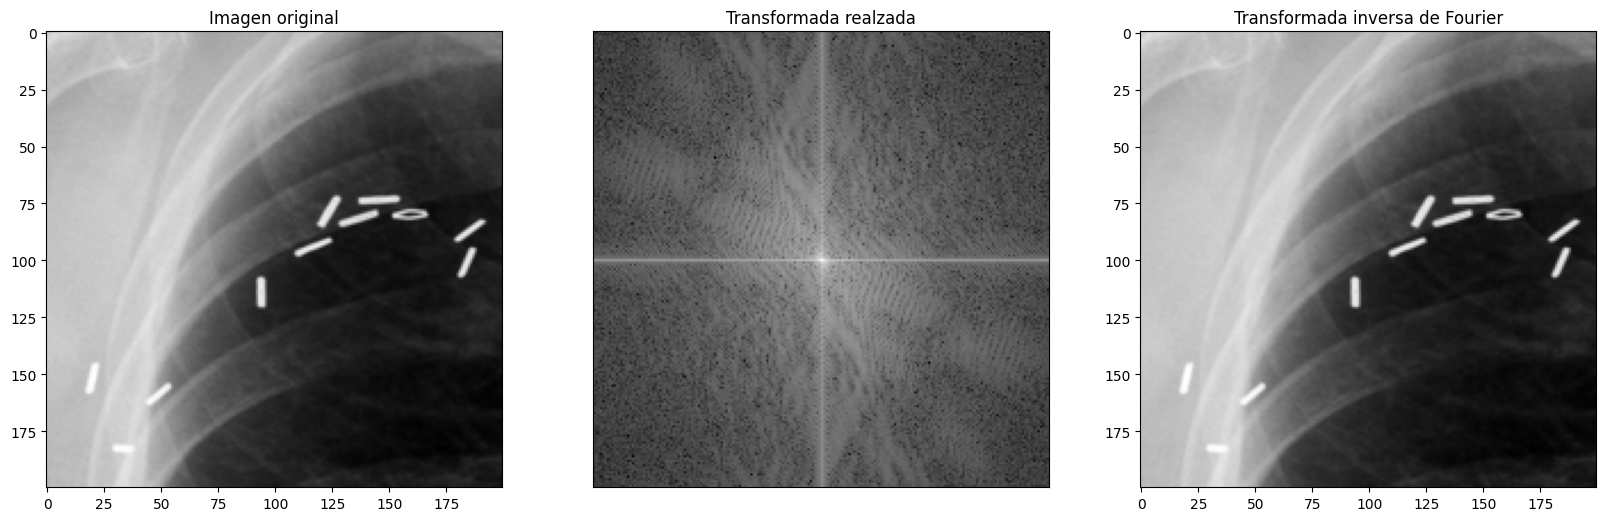

In [7]:
Itf_ima=np.fft.ifft2(tf_ima)

plt.figure(figsize=(20,6))
plt.subplot(131),plt.imshow(ima, cmap = 'gray')
plt.title('Imagen original')

plt.subplot(132),plt.imshow(transf_realzada, cmap = 'gray')
plt.title('Transformada realzada'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(np.real(Itf_ima), cmap = 'gray')
plt.title('Transformada inversa de Fourier')

plt.show()

## Convolucion 2D

In [8]:
A=np.array( [[1,-3,4],[2,2,0]])
B=np.array([[1,2],[-1,4]])

In [9]:
conv2d = signal.convolve2d(A, B, boundary='fill', fillvalue=0, mode='full')
print(conv2d)

# en 1D el tamano de la conv es la suma de los tamanos menos 1
# boundary='fill' -> es por si queremos que se rellenen los bordes (como si fuera la convolucion lineal no circular)
# valor con el que rellena los bordes -> fillvalue
# mode='full' -> tamaño resultado = tamaño de la matriz A + tamaño matriz B - 1 (resultado completo de la conv. lineal)
# si pongo mode='same' -> cuando quiero que el resultado tenga el mismo tamaño de la imagen original (OJO que recorta partes)


[[  1  -1  -2   8]
 [  1  13 -12  16]
 [ -2   6   8   0]]


In [10]:
print("El tamaño de A es ", A.shape)
print("El tamaño de B es ", B.shape)
print("Las dimensiones de la conv son ",conv2d.shape)
print("Es igual que la suma de las dimensiones-1 ")
print(A.shape[0] + B.shape[0]-1,A.shape[1] + B.shape[1]-1 )

El tamaño de A es  (2, 3)
El tamaño de B es  (2, 2)
Las dimensiones de la conv son  (3, 4)
Es igual que la suma de las dimensiones-1 
3 4


Realizar una convolución utilizando la imagen de pulmón

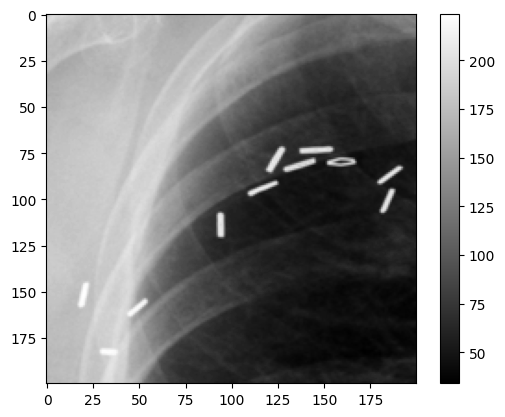

ima=
[[177 180 184 ... 129 126 125]
 [184 189 193 ... 129 129 128]
 [191 193 197 ... 129 125 128]
 ...
 [168 169 172 ...  50  49  47]
 [169 172 174 ...  53  52  48]
 [170 172 173 ...  52  51  47]]


In [11]:
plt.imshow(ima, cmap='gray')
plt.colorbar()
plt.show() 
print('ima=')  
print(ima)

Realizar la convolución 2D entre la matriz ima y la matriz K

In [12]:
K= np.ones ((5,5))/25
print('K=')
print(K)
CONV=signal.convolve2d(ima, K, boundary='fill', fillvalue=0, mode='full') #probar con mode='same'
# rellenamos bordes con cero

K=
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Verificar dimensiones y graficar los resultados

Debería dar:
$(200,200) + (5,5) - (1,1) = (204,204)$ tamaño de la matriz convolucion

(200, 200)
(5, 5)
(204, 204)


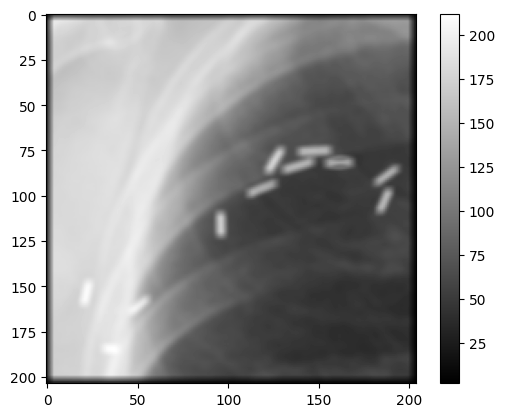

In [13]:
print(ima.shape)
print(K.shape)
print(CONV.shape)

plt.imshow(CONV, cmap='gray')
plt.colorbar()

Se ve un borde negro porque le pusimos un boundary = 0

### **Se atenuan frecuencias mas altas.**

¿Qué diferencia hay entre el modo same y el full?

### Ejercicio 2: Teorema de la convolucion 2D

Analizar la relacion entre la transformada de Fourier 2D y la convolucion 2D

In [14]:
print(K)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


In [15]:
#Primero hacemos la convolucion de ima con K
CONV=signal.convolve2d(ima,K, boundary='fill', mode='full') #fillvalue=0, 

#Ahora realizamos las transformada de cada una de las matrices 
TF_IMA = np.fft.fft2(ima)
TF_K = np.fft.fft2(K)


In [16]:
#y ahora calculamos la transf inversa del producto punto a punto
CONV_teo= np.fft.ifft2(TF_IMA*TF_K)

# error: no tienen el mismo tamaño

ValueError: operands could not be broadcast together with shapes (200,200) (5,5) 

**¿Qué paso?**

Chequear dimensiones

In [17]:
print("El tamaño de TF_IMA es ", TF_IMA.shape)
print("El tamaño de TF_K es ", TF_K.shape)


El tamaño de TF_IMA es  (200, 200)
El tamaño de TF_K es  (5, 5)


El problema es que tienen distintas dimensiones.

In [18]:
#Redimensionamos
s_0= 200+5-1
s_1= 200+5-1

TF_IMA=np.fft.fft2(ima,(s_0,s_1))

TF_K=np.fft.fft2(K,(s_0,s_1))

print("El nuevo tamaño de TF_IMA es ", TF_IMA.shape)
print("El nuevo tamaño de TF_K es ", TF_K.shape)

#Recalculamos transformada inversa de la multiplicación de transformadas de Fourier
CONV_teo= np.fft.ifft2(TF_IMA*TF_K)

# ahora no hay error

El nuevo tamaño de TF_IMA es  (204, 204)
El nuevo tamaño de TF_K es  (204, 204)


#### Graficamos los resultados de las convoluciones

In [19]:
K

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

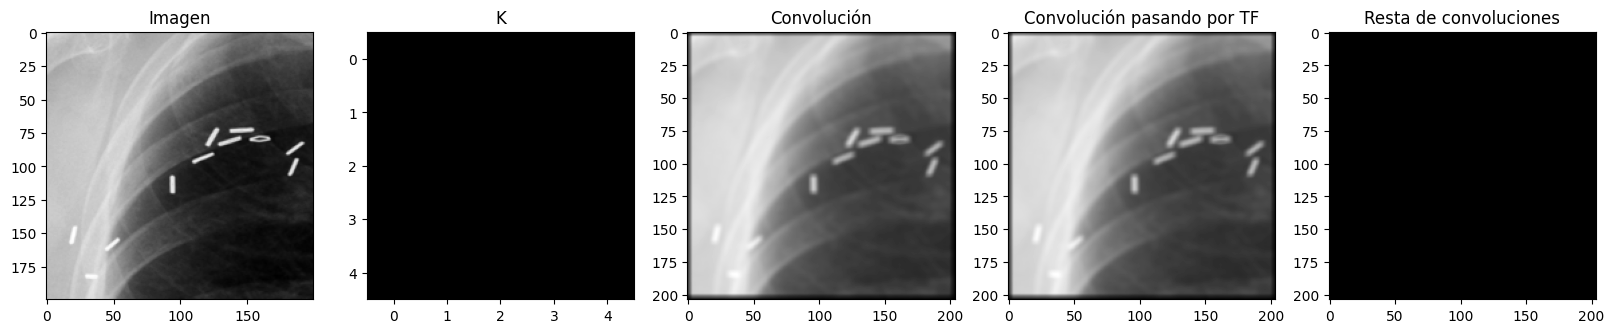

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(151), plt.imshow(np.real(ima), cmap='gray'), plt.title('Imagen')
plt.subplot(152), plt.imshow(K, cmap='gray'), plt.title('K')
plt.subplot(153), plt.imshow(np.real(CONV), cmap='gray'), plt.title('Convolución')
plt.subplot(154), plt.imshow(np.real(CONV_teo), cmap='gray'), plt.title('Convolución pasando por TF')
plt.subplot(155), plt.imshow(np.real(CONV-CONV_teo), cmap='gray', vmin=0,vmax=1), plt.title('Resta de convoluciones')
plt.show()

#### Graficamos en Frecuencia

(<Axes: title={'center': 'Resta de TF'}>,
 Text(0.5, 1.0, 'Resta de TF'))

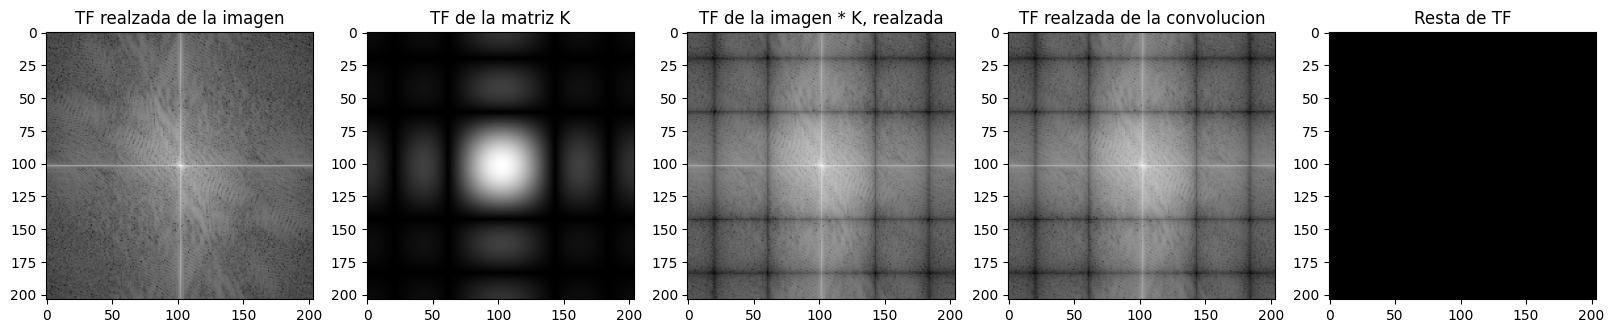

In [22]:
plt.figure(figsize=(20,6))

plt.subplot(151)
plt.imshow(20*np.log(abs(np.fft.fftshift(TF_IMA))), cmap = 'gray')
plt.title('TF realzada de la imagen')

plt.subplot(152)
plt.imshow(np.fft.fftshift(abs(TF_K)), cmap = 'gray')
plt.title('TF de la matriz K')

plt.subplot(153)
plt.imshow(20*np.log(abs(np.fft.fftshift(TF_IMA*TF_K))), cmap = 'gray')
plt.title('TF de la imagen * K, realzada')

TF_CONV=np.fft.fft2(CONV)
plt.subplot(154),plt.imshow(20*np.log(abs(np.fft.fftshift(TF_CONV))), cmap = 'gray'), plt.title('TF realzada de la convolucion')

plt.subplot(155),plt.imshow(np.real((TF_CONV-(TF_IMA*TF_K))), cmap = 'gray', vmin=0, vmax=1), plt.title('Resta de TF')

# Filtros

Son operaciones que consideran y utilizan los valores de los vecinos de cada pixel.

Se destacan dos tipos de filtros:

- **Lineales**: combinación lineal (de los pixeles vecinos), convolución (y correlación)
- **No lineales**: de Orden, se ordena los valores de los vecinos y se elige el mínimo, máximo o la mediana por ejemplo.

## Filtros lineales: Convolución - correlación

Combinación lineal de un entorno de vecinos, los coeficientes vienen dados por un kernel o máscara del tamaño del vecindario o entorno, incluido el pixel central.

Según el kernel o máscara será el efecto en la imagen.
Se destacan dos tipos:

- Filtros de **suavisado**, o filtros **pasa bajo** (de promediado)
- Filtros de **bordes o detalles**, o filtro **pasa alto** (de diferencia)

Para realizar la convolución (o correlación también) se necesitan dos señales 2D, es decir dos matrices:
- La imagen: A 
- El Kernel: K 

### Ejercicio 3
a) Generar una imagen con 6 niveles de gris. (Bandas)

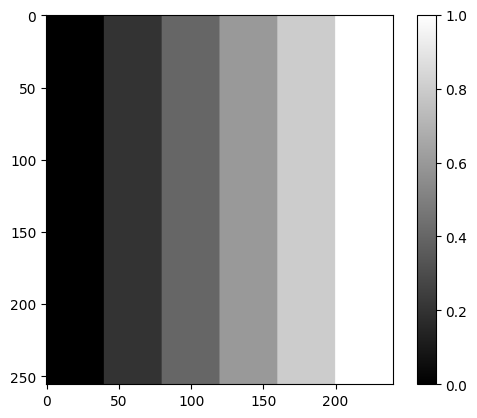

In [37]:
A= np.ones((256, 240))
A[:, 0:40]=0
A[:, 40:80]=0.2
A[:, 80:120]=0.4
A[:, 120:160]=0.6
A[:, 160:200]=0.8
A[:, 200:240]=1
#completar 

plt.imshow(A, cmap='gray')
plt.colorbar()
plt.show()

b) Generar el kernel (o máscara):

#### Kernel promediado (paso bajo)

In [36]:
#Definimos una función para generar una máscara o kernel cuadrado para promedio (suavisado)
def kernel_prom(n):
    return(np.ones((n,n),np.float32)/(n**2))

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
Notar que la suma de sus elementos da: 1.0


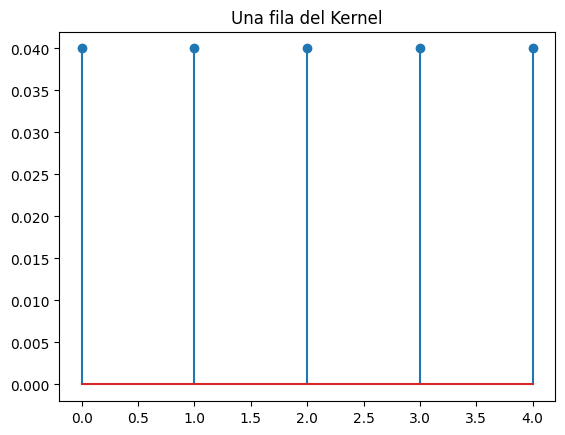

In [38]:
# genero la máscara o kernel
n=5 #lo ideal y usual es n impar
kernel=kernel_prom(n) 
print(kernel)
print('Notar que la suma de sus elementos da:', np.sum(kernel))
plt.stem(kernel[0])
plt.title('Una fila del Kernel')
plt.show()

La función **cv2.filter2D** :

- calcula la correlación (la correlación es análoga a convolución pero sin rotar la máscara. Cuando la máscara (kernel) es "bi-simétrica" convolución y correlación coinciden)

- el resultado tiene el mismo tamaño que la imagen entrante (la función recorta la correlación para lograr esto)

- ddepth , asociado al tipo de datos (depth) del resultado 	(-1, para igual tipo de datos que la entrada)

- anchor indica la posición del pivote del kernel; default:(-1,-1) lugar central.

https://www.askpython.com/python-modules/opencv-filter2d 

Tamaño original: (256, 240) Tamaño filtrada: (256, 240)


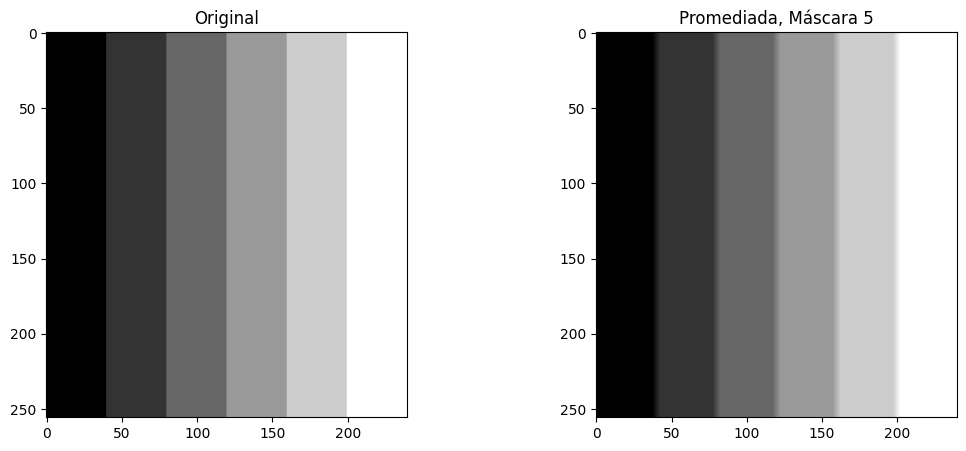

In [39]:
# Hacemos la correlación:
A_suav = cv2.filter2D(A,-1,kernel) #El -1 (ddepth) indica que la salida será del mismo tipo que A
print('Tamaño original:',A.shape, 'Tamaño filtrada:', A_suav.shape)

plt.figure(figsize=(13,5))
plt.subplot(121),plt.imshow(A,cmap='gray'),plt.title('Original')
#plt.xticks([]), plt.yticks([]) #para que no escriba la escala
plt.subplot(122),plt.imshow(A_suav,cmap='gray'),plt.title('Promediada, Máscara %d' %(n))
#plt.xticks([]), plt.yticks([]) #para que no escriba la escala
plt.show()

#### kernel Gaussiano  (paso bajo)

Promedio ponderado

[[0.03663285]
 [0.11128076]
 [0.21674532]
 [0.27068215]
 [0.21674532]
 [0.11128076]
 [0.03663285]]
Notar que la suma de los coeficientes: 0.9999999999999999


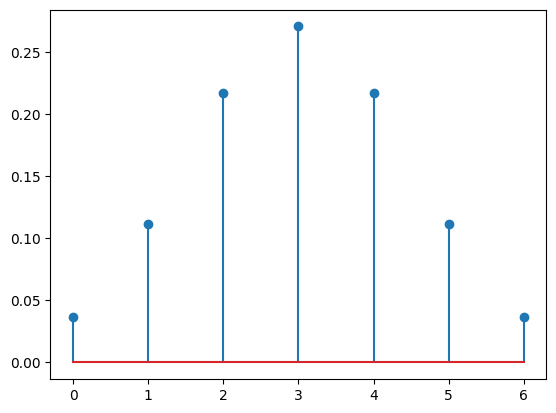

In [40]:
n=7
kernel_gauss1D = cv2.getGaussianKernel(n, 1.5)
# el 1.5 es la varianza que le doy a la varianza
print(kernel_gauss1D)
print('Notar que la suma de los coeficientes:',np.sum(kernel_gauss1D))
plt.stem(kernel_gauss1D)
plt.show()

In [41]:
#Función para generar un kernel Gausiano 2D
def GaussianKernel2D(nfil, ncol, sigmaf, sigmac):
    return(np.dot(cv2.getGaussianKernel(nfil, sigmaf), np.transpose(cv2.getGaussianKernel(ncol, sigmac))))

[[0.005 0.009 0.013 0.015 0.013 0.009 0.005]
 [0.009 0.017 0.025 0.028 0.025 0.017 0.009]
 [0.013 0.025 0.036 0.041 0.036 0.025 0.013]
 [0.015 0.028 0.041 0.047 0.041 0.028 0.015]
 [0.013 0.025 0.036 0.041 0.036 0.025 0.013]
 [0.009 0.017 0.025 0.028 0.025 0.017 0.009]
 [0.005 0.009 0.013 0.015 0.013 0.009 0.005]]
Notar que la suma de los coeficientes es igual a: 0.9999999999999999


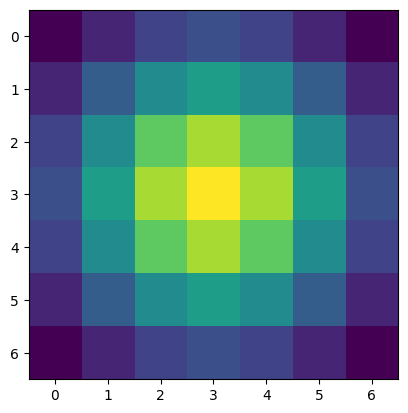

In [45]:
nfil=7
ncol=7
sigmaf=2 # tamaño de filas
sigmac=2 # tamaño de columnas
# sigmas iguales = queda simétrico el kernel
kernel_gauss2D = GaussianKernel2D(nfil, ncol, sigmaf, sigmac) #función antes definida
print(np.round(kernel_gauss2D, decimals=3))
print('Notar que la suma de los coeficientes es igual a:',np.sum(kernel_gauss2D))
plt.imshow(kernel_gauss2D)
plt.show()

Tamaño original: (256, 240) Tamaño filtrada: (256, 240)


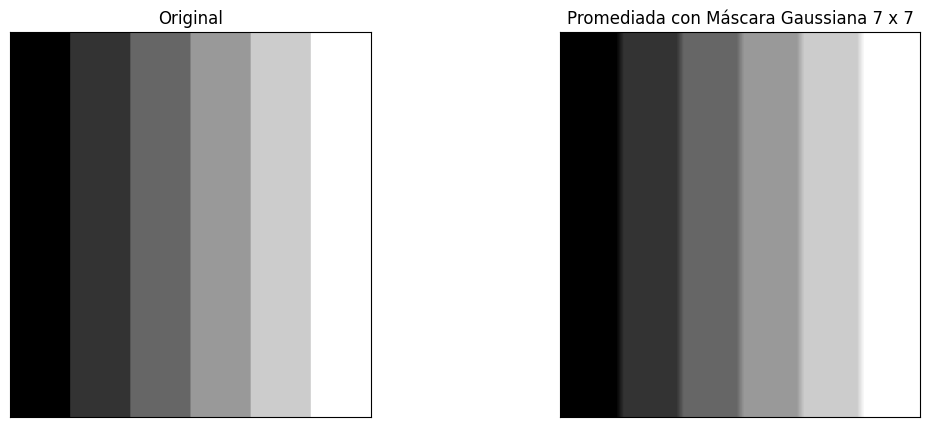

In [43]:
A_suavGauss = cv2.filter2D(A,-1,kernel_gauss2D) # usamos la imagen A y el kernel
print('Tamaño original:',A.shape, 'Tamaño filtrada:', A_suavGauss.shape)

plt.figure(figsize=(13,5))
plt.subplot(121),plt.imshow(A,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) #para que no escriba la escala
plt.subplot(122),plt.imshow(A_suav,cmap='gray'),plt.title("Promediada con Máscara Gaussiana {0:d} x {1:d}".format(nfil,ncol) )


plt.xticks([]), plt.yticks([]) #para que no escriba la escala
plt.show()

Hay una función que realiza filtrado con kernel Gaussiano, 2 en 1: **cv2.GaussianBlur**

Tamaño original: (256, 240) Tamaño filtrada: (256, 240)
datos original: float64 Datos filtrada: float64


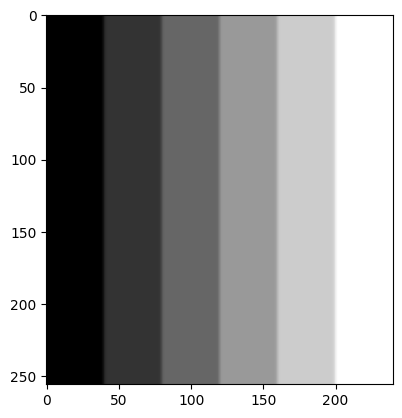

In [ ]:
A_suav_G2en1 = cv2.GaussianBlur(A,(nfil,ncol),1,2,-1) # 2 en 1: genera el kernel Gaussiano nxn y realiza el filtrado
print('Tamaño original:',A.shape, 'Tamaño filtrada:', A_suavGauss.shape)
print('datos original:',A.dtype, 'Datos filtrada:', A_suavGauss.dtype)
plt.imshow(A_suav_G2en1,cmap='gray')

#### kernel para detección de Bordes (paso alto):
Para encontrar bordes/cambios se usan máscaras de diferencia: Prewit por ej.

##### kernels Prewitt

In [46]:
#máscara/kernel Prewitt 3x3: 
#Para Bordes Diagonales
KPD=np.array([[1, 1, 0], [1, 0, -1], [0, -1, -1]])
print(KPD)
print('Notar que la suma de los coeficientes da: ', np.sum(KPD))

[[ 1  1  0]
 [ 1  0 -1]
 [ 0 -1 -1]]
Notar que la suma de los coeficientes da:  0


In [47]:
#Para bordes Verticales:
KPV= np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  
print(KPV)
print('La suma de los coeficientes da: ', np.sum(KPV))

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
La suma de los coeficientes da:  0


In [48]:
#Para Bordes Horizontales
KPH= np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
print(KPH)
print('La suma de los coeficientes da: ', np.sum(KPH))

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]
La suma de los coeficientes da:  0


In [49]:
I=cv2.imread('Ortopantomografia.jpg',0) #abrimos imagen monocroma
print(I.dtype)

uint8


In [50]:
#Cambiemos el tipo de datos
I=I.astype(float)
print(I.dtype)

float64


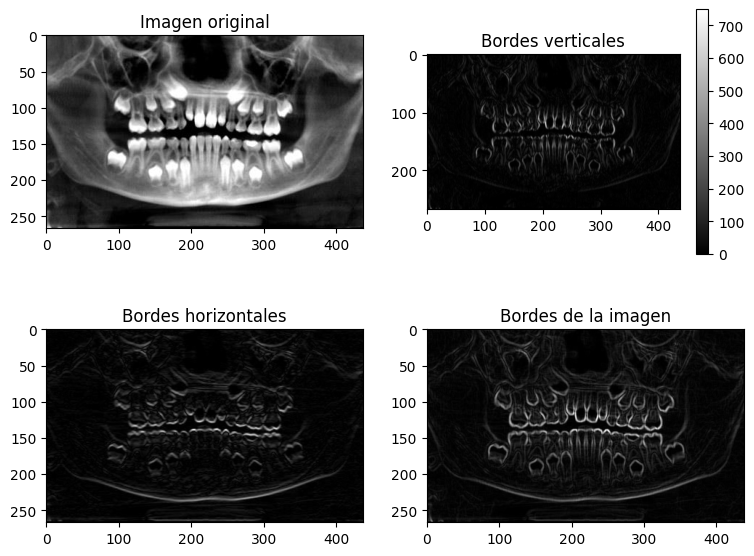

Notar la importancia del tipo de datos en este caso


In [51]:
OP_v=cv2.filter2D(I, -1, KPV )   #Buscar bordes verticales de la imagen.
OP_h=cv2.filter2D(I, -1, KPH  )    #Buscar bordes horizontales de la imagen
Bordes= abs(OP_v)+abs(OP_h) # fusion de bordes

plt.figure(figsize=(9,7))
plt.subplot(221),plt.imshow(I,cmap='gray'),plt.title('Imagen original')
plt.subplot(222),plt.imshow(abs(OP_v),cmap='gray'),plt.title('Bordes verticales')
# sin el valor abs se va a valores negativos => 0 queda gris, negativo = negro, positivo = blanco
plt.colorbar()
plt.subplot(223),plt.imshow(abs(OP_h),cmap='gray'),plt.title('Bordes horizontales')
#plt.colorbar()
plt.subplot(224),plt.imshow(Bordes,cmap='gray'),plt.title('Bordes de la imagen')
plt.show()

print('Notar la importancia del tipo de datos en este caso')

#### kernels Sobel

In [ ]:
#Sobel para bordes Verticales:
KSV= np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])  
print(KSV)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [ ]:
#Sobel para Bordes Horizontales
#KBH= np.array([[ ], [], []])    #completar
#print(KBH)

### Kernels Laplacianos

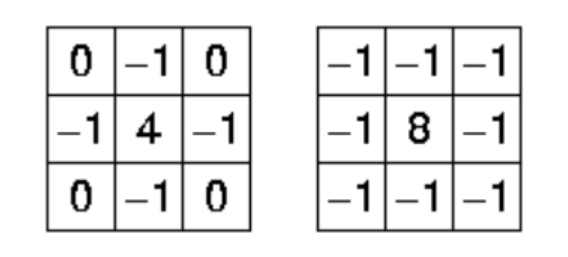


Notamos que siempre **las máscaras (kernels) de diferencia, la suma de sus coeficientes es 0**

Esta característica deviene en una imagen filtrada con zonas cercanas a 0 en donde la original tenía valores homogéneos (de intensidad pareja o casi constante)

In [ ]:
HI=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) # Kernel de filtro pasa alto, para resaltar bordes, detalles, cambios rápidos
print(HI)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


In [ ]:
#Filtrar la imagen I con este kernel, que sucede?

### Ejercicio 4: Filtrar la imagen neumonia_izq de labs pasados con un kernel, luego graficar

In [ ]:
neumo=cv2.imread('neumonia_izq.jpg',0)
#completar